In [8]:
import pandas as pd
import numpy as np

In [9]:
df= pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.shape

(2200, 8)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df.label.unique().shape


(22,)

In [15]:
df.label.replace(['rice','maize','chickpea','kidneybeans','pigeonpeas','mothbeans','mungbean',
                  'blackgram','lentil','pomegranate','banana','mango','grapes','watermelon',
                  'muskmelon','apple','orange','papaya','coconut','cotton','jute','coffee'],
                 [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],inplace=True)
df['label'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

<ipython-input-16-4329715de8d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set1')


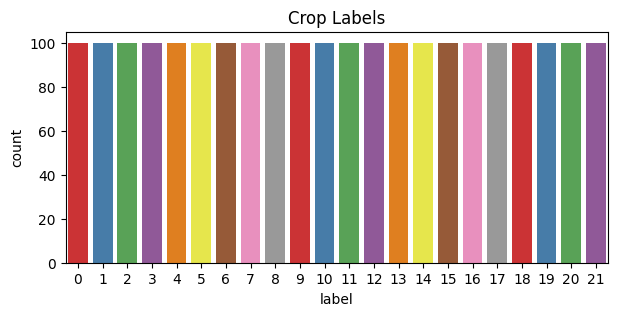

In [16]:
plt.figure(figsize=(7, 3))
sns.countplot(x='label', data=df, palette='Set1')
plt.title('Crop Labels')
plt.show()

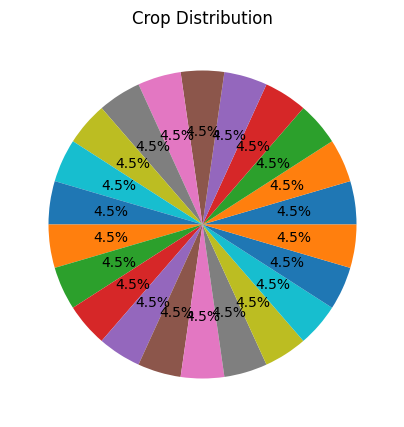

In [17]:
label_counts=df['label'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(label_counts, autopct='%1.1f%%', startangle=0)
plt.title('Crop Distribution')
plt.show()

<Axes: >

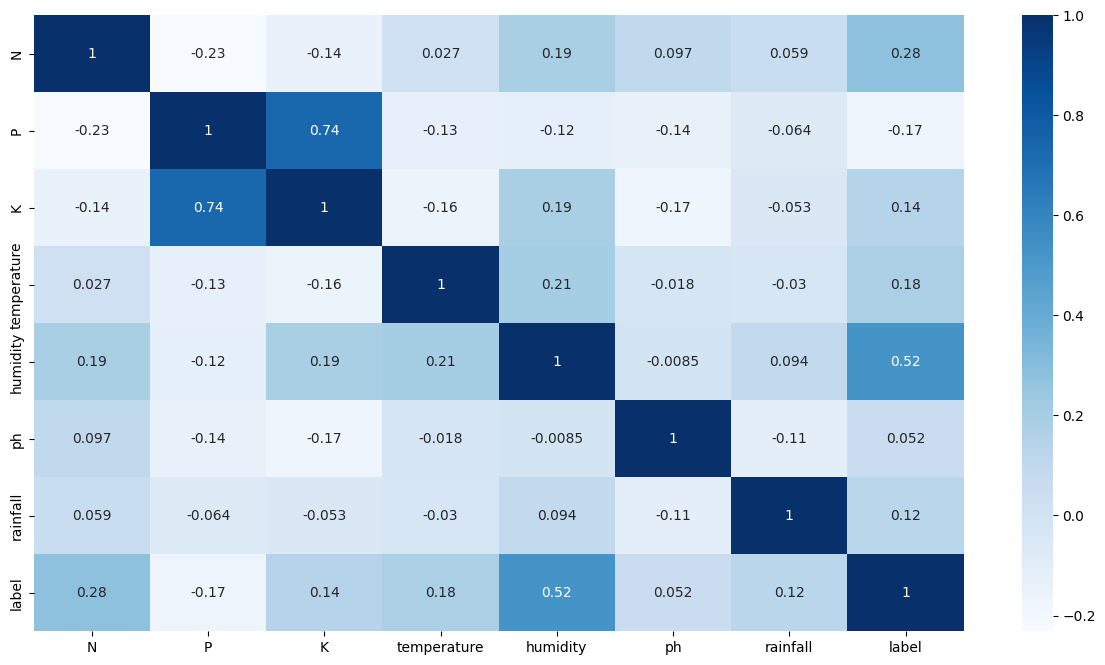

In [18]:
corelation=df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corelation,annot=True,cmap='Blues')

In [19]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int64
dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = df.drop(['label'],axis=1)
y = df['label']
x.head(3),y.head(3)

(    N   P   K  temperature   humidity        ph    rainfall
 0  90  42  43    20.879744  82.002744  6.502985  202.935536
 1  85  58  41    21.770462  80.319644  7.038096  226.655537
 2  60  55  44    23.004459  82.320763  7.840207  263.964248,
 0    0
 1    0
 2    0
 Name: label, dtype: int64)

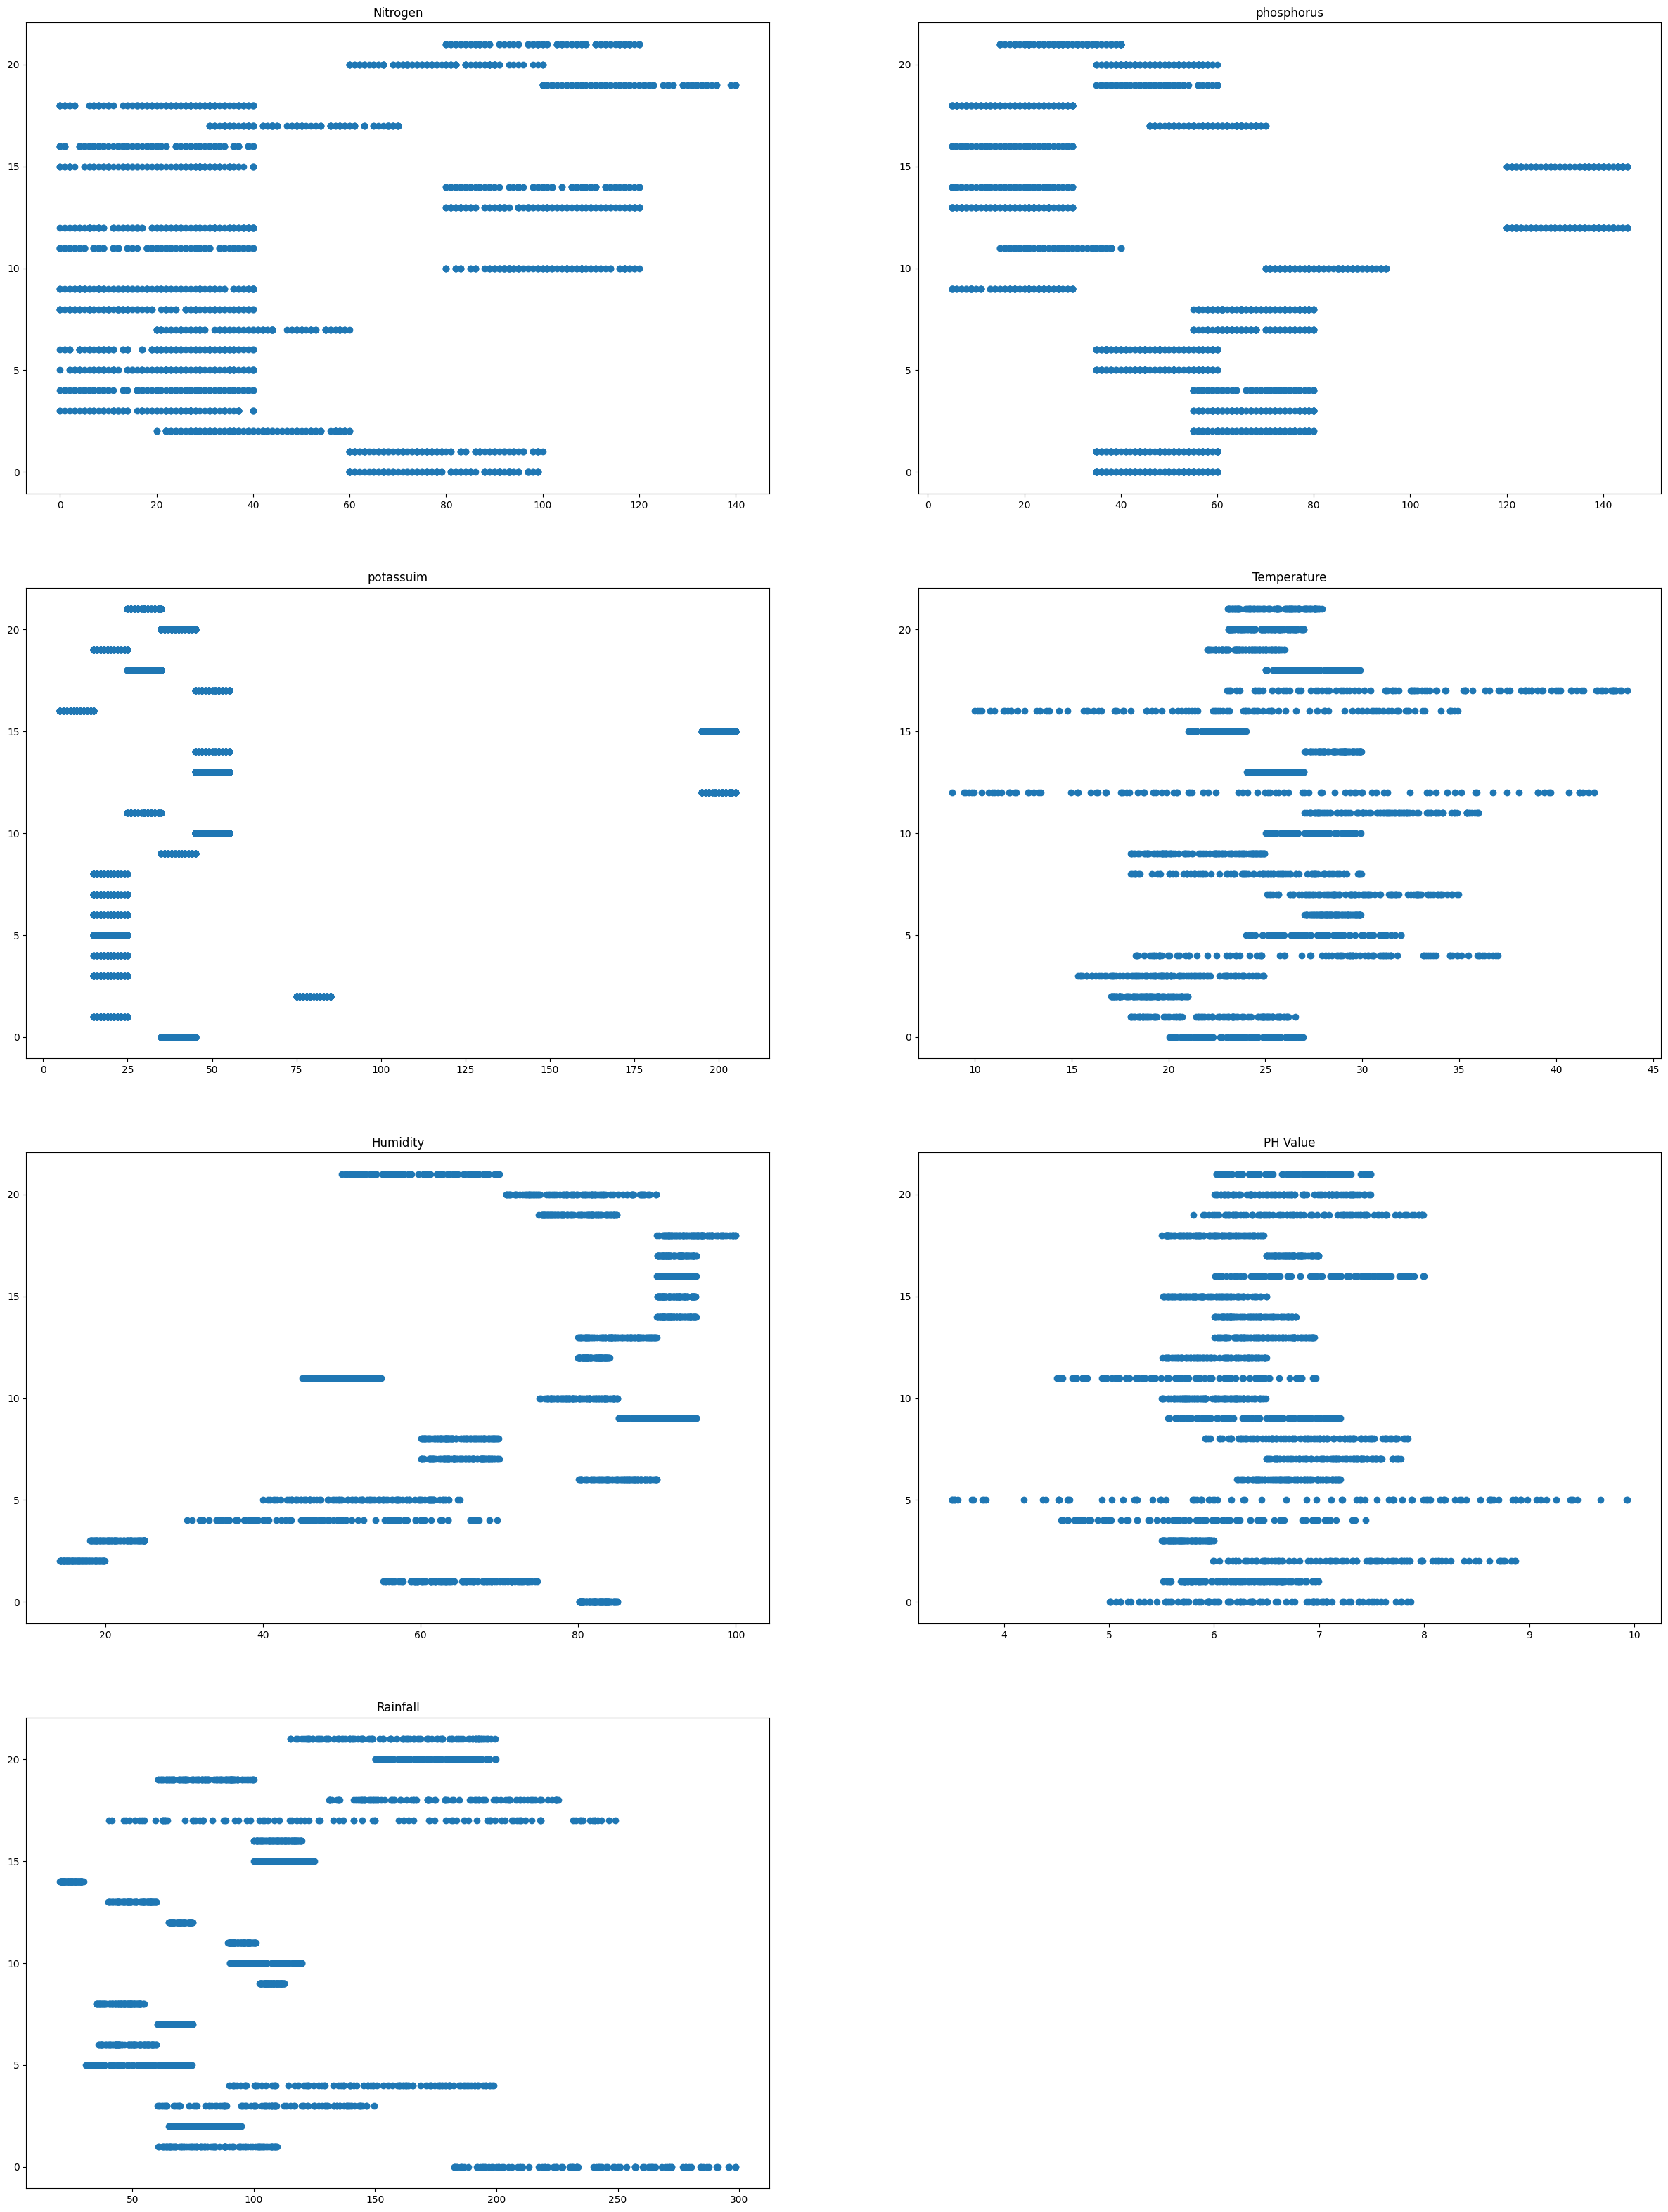

In [22]:
plt.figure(figsize=(30, 40))

plt.subplot(4, 2, 1)
plt.scatter(df['N'], y)
plt.title('Nitrogen')

plt.subplot(4, 2, 2)
plt.scatter(df['P'],y)
plt.title('phosphorus')

plt.subplot(4, 2, 3)
plt.scatter(df['K'],y)
plt.title('potassuim')

plt.subplot(4, 2, 4)
plt.scatter(df['temperature'], y)
plt.title('Temperature')

plt.subplot(4, 2, 5)
plt.scatter(df['humidity'],y)
plt.title('Humidity')

plt.subplot(4, 2, 6)
plt.scatter(df['ph'],y)
plt.title('PH Value')

plt.subplot(4, 2, 7)
plt.scatter(df['rainfall'], y)
plt.title('Rainfall')

#plt.tight_layout()
plt.show()

In [23]:
train_x , test_x , train_y ,test_y = train_test_split(x,y, test_size= 0.2,random_state = 7)
train_x.shape  , test_x.shape  , train_y.shape  ,test_y.shape

((1760, 7), (440, 7), (1760,), (440,))

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_x,train_y)

RandomForestClassifier(random_state=42)

In [25]:
predictions = model.predict(test_x)
predictions

array([18,  0, 19,  2,  7,  0, 19, 14,  8,  5,  9,  7,  8, 12,  1,  5, 13,
       11, 15, 10,  8,  7, 15, 17, 11,  7,  9,  8,  4,  8, 19, 11,  9, 10,
       15,  0, 13,  7,  4,  6, 12,  2, 13, 16,  4, 14, 16,  9, 11,  2,  2,
       12, 18,  2,  6,  0, 13,  4,  8,  1, 16,  7, 16,  8, 10,  9, 15, 16,
        8,  0, 16,  6, 17,  8, 20,  2, 18, 15, 17, 18, 11, 18,  6, 17,  4,
        7, 12, 14,  6, 20,  0,  3,  2,  6,  3,  8,  3, 21, 21, 13, 19,  4,
       18, 10,  3, 18, 16, 19,  4,  2, 10,  8, 10,  0, 14,  2, 21, 20, 21,
        9, 16,  5, 13,  1, 19,  5, 11,  6, 21, 21,  7, 21, 10,  0,  7, 16,
       18,  6, 16, 19, 19, 21,  4,  8,  5, 11, 18, 18, 13,  5, 18,  4, 18,
        6,  2,  3, 20, 11, 16, 15,  2, 12,  2,  1, 17, 16,  0, 21, 16, 15,
        5,  5, 18, 13, 10,  7,  1,  3, 14,  4, 16,  4,  8, 11, 10,  3,  2,
        2, 16, 19, 14, 19, 11, 16, 12, 19,  5,  3, 13, 15,  6, 21,  5, 15,
        1, 11, 17,  9,  2,  5, 19, 11,  8, 17,  0,  7, 21, 12, 20,  6,  7,
       15,  3,  3,  8, 20

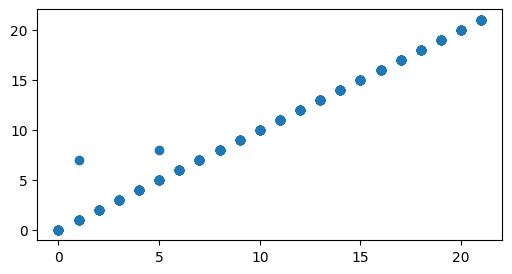

In [26]:
plt.figure(figsize=(6,3))
plt.scatter(predictions,test_y)
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error
error =mean_absolute_error(test_y,predictions)
error

0.020454545454545454

In [28]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(test_y,predictions)
print(f"Validation Accuracy: {acc:.6f}")

Validation Accuracy: 0.995455


In [30]:
model.predict([[99,15,27,27.417112,56.636362,6.086922,127.924610]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([21])